# 단어 표현법

## 단어의 표현 방법
단어의 표현 방법은 크게 국소 표현(Local Representation)방법과 분산 표현(Distributed Representation)방법으로 나뉨

국소 표현(=이산 표현): 해당 단어 그 자체만보고, 특정 값을 맵핑하여 단어를 표현하는 방법
EX) '강아지', '귀여운', '사랑스런' 단어가 들어오면 각각 1, 2, 3 같이 숫자로 맵핑

분산 표현(=연속 표현): 그 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법
EX) '강아지'라는 단어 주변에는 주로 '귀여운', '사랑스런'이라는 단어가 자주 등장하므로, '강아지'라는 단어는 '귀여운', '사랑스런' 느낌이다로 단어를 정의

![nn](img/word_representation01.png)

## Bag of Words(BoW)

직역하면 단어들의 가방이라는 의미
단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터 수치화 표현 방법

문서를 자동으로 분류하기 위한 방법중 하나로서, 글에 포함된 단어들의 분포를 보고 이 문서가 어떤 종류의 문서인지를 판단함
컴퓨터 비전에도 사용되었음

### 한계
**1.문맥 의미 반영 부족**
>순서를 고려하지 않기 때문에 문맥적인 의미가 무시됨

**2.희소 행렬 문제**
>문서는 대부분 서로 다른 단어로 구성되며 이에따라 문서마다 단어가 나타나지 않는 경우가 훨씬 많음
>따라서 대부분 행렬이 0으로 채워기게됨

## 문서 단어 행렬(Document-Term Matrix, DTM)

서로 다른 문서들의 BoW들을 결합한 표현 방법
행과 열을 반대로 선택하면 TDM이라고 부르기도 함
서로 다른 문서 비교 가능


### 표기법
문서 단어 행렬이란 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것
쉽게 생각하면 각 문서에 대한 BoW를 하나의 행렬로 만든 것으로 생각할 수 있으며, BoW와 다른 표현 방법이 아니라 BoW 표현을 다수의 문서에 대해서 행렬로 표현하고 부르는 용어

EX)
문서1: 먹고 싶은 사과
문서2: 먹고 싶은 바나나
문서3: 길고 노란 바나나 바나나
문서4: 저는 과일이 좋아요

![nn](img/DTM_01.png)

문서 단어 행렬은 문서들을 서로 비교할 수 있도록 수치화할 수 있음
불용어를 제거한다면 더 정제된 DTM을 만들 수 있음

### 한계
**1.희소 표현**
>대부분 값이 0으로 채워질 수 있음

**2.단순 빈도 수 기반 접근**
>영어를 예시로 불용어인 'the'가 어떤 문서이든 자주 등장할 수 밖에 없음 -> 'the'의 빈도가 높다해서 문서1, 2, 3을 유사한 문서로 판단해서는 안됨

>중요한 단어에는 가중치 부여 필요

## TF-IDF(Term Frequency-Inverse Document Frequency)
모든 문서에서 자주 쓰일 수 밖에 없는 단어들(불용어)이 중요하다 인식될 수 있음
개별 문서에서 자주 등장하는 단어에 높은 가중치를 부여하되, 모든 문서에서 자주 등장하는 단어에 대해서는 패널티를 부과하는 방법



tf(d, t): 특정 문서 d에서의 특정 단어 t의 등장 횟수

df(t): 특정 단어 t가 등장한 문서의 수

특정 단어가 각 문서, 또는 문서들에서 몇 번 등장했는지는  관심가지지 않으며 오직 특정 단어 t가 등장한 문서의 수에만 관심을 가짐
문서2, 문서3 에서 바나나가 각 100번 등장하더라도 df는 2임

idf(d, t): df(t)에 반비례하는 수

![nn](img/idf_01.png)

idf는 df의 역수이지만 단순히 역수로 나타내는 경우 총 문서의 수 n이 커질수록, idf값은 기하급수적으로 증가하게 됨

그렇기 때문에 log를 사용

분모의 1을 더해주어 단어가 등장하지 않아도 분모가 0이 되는것을 방지

**log 사용시**　　　　　　　　　　　　　　　　**log 미사용시**

<img src="img/idf_02.png" width="30%" height="30%"/>
<img src='img/idf_03.png' width="31%" height="31%"/>


## 워드 임베딩(Word Embedding)
- 단어를 밀집 벡터(dense vector)의 형태로 표현하는 방법을 워드 임베딩이라고 함
- 이 밀집 벡터를 워드 임베딩 과정을 통해 나온 결과라고 하여 임베딩 벡터라고도 함
- 워드 임베딩 방법론으로는 LSA, Word2Vec, FastText, Glove등이 있음

### 희소 표현
- 원-핫 벡터들은 표현하고자 하는 단어의 인덱스 값만 1, 나머지는 0으로 표현. 이를 희소 표현이라고 함
- 원-핫 벡터 == 희소 벡터
- Ex) 강아지 = [ 0 0 0 0 1 0 0 0 0 0 0 0 ... 중략 ... 0]

    - 단점
    공간이 낭비 됨
    희소 벡터의 문제점은 단어의 의미를 표현하지 못함

### 밀집 표현
- 희소 표현과 반대되는 표현. 밀집 표현은 벡터의 차원을 단어 집합의 크기로 상정하지 않음
- 0, 1이 아닌 실수 값을 가짐
- Ex) 강아지 = [0.2 1.8 1.1 -2.1 1.1 2.8 ... 중략 ...] # 이 벡터의 차원은 128

<p align='center'><img src='img/word%20embedding_01.png'  width='50%' height='50%'/></p>

### Word2Vec
- 원-핫 벡터는 단어 벡터 간 유의미한 유사도를 계산할 수 없다는 단점이 있음
- 단어 벡터 간 유의미한 유사도를 반영할 수 있도록 단어의 의미를 수치화 할 수 있는 방법이 필요
- 이를 위해 사용되는 대표적인 방법이 워드투벡터
- Word2Vec의 학습 방식에는 CBOW, Skip-Gram 두 가지 방식이 존재

### CBOW(Continuous Bag Of Word)
- 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법
- EX) '나는 자연어 공부를 한다' 에서 ['나는', '공부를', '한다'](주변 단어)로부터 '자연어'(중심 단어)를 예측하는 일을 함
- 이렇게 중심 단어를 예측하기 위해서 몇 개의 주변 단어를 볼지를 결정해야 하는데 이 범위를 윈도우라고 함(실제 예측시 앞, 뒤 n개의 단어 즉, 2n개의 단어 사용)

<img src='img/day04_01.png' width='70%' height='70%'>
윈도우를 옆으로 움직여서 주변 단어와 중심 단어의 선택을 변경해가며 학습을 위한 데이터 셋 만듬(슬라이딩 윈도우)

<img src='img/day04_02.png' width='70%' height='70%'>
CBOW를 도식화한 이미지

입력층의 입력으로서 앞, 뒤로 사용자가 정한 윈도우 크기 범위 안에 있는 주변 단어들의 원-핫 벡터가 들어가게 되고, 출력층에서 예측하고자 하는 중간 단어의 원-핫 벡터가 레이블로서 필요

위 그림에서 알 수 있는 사실은 Word2Vec은 은닉층이 다수인 딥러닝 모델이 아니라 은닉층이 1개인 얕은 신경망(shallow neural network)임

또한 Word2Vec의 은닉층은 일반적인 은닉층과는 달리 활성화 함수가 존재하지 않으며 룩업 테이블이라는 연산을 담당하는 층으로 투사층(projection layer)이라고도 함

#### CBOW 동작메커니즘
<img src='img/cbow_01.png' width='70%' height='70%'>

- CBOW에서 투사층의 크기 M은 임베딩하고 난 벡터의 차원, 해당 그림에서는 M=5
- 입력층과 투사층 사이의 가중치 W는 V x M 행렬이며, 투사층에서 출력층사이의 가중치 W'는 M x V 행렬(V는 단어 집합 크기)
- V x M != M x V 둘은 전치 행렬이 아닌 서로 다른 행렬
- 가중치 행렬 W 와 W'는 랜덤 값을 가지게 되며 주변 단어로 중심 단어를 더 정확치 맞추기 위해 계속 학습해가는 구조

<img src='img/cbow_04.png' width='70%' height='70%'>

- 위 그림에서 각 주변 단어의 원-핫 벡터를 x로 표기
- 입력 벡터는 원-핫 벡터. 원-핫 벡터와 가중치 W행렬의 곱은 사실 W행렬의 i번째 행을 그대로 읽어오는 것(lookup)과 동일
- 이 작업을 룩업 테이블(lookup table)이라고 함
- CBOW의 목적은 W와 W'를 잘 훈련시키는 것, 그 이유는 lookup해온 W의 각 행벡터가 Word2Vec 학습 후에는 각 단어의 M차원의 임베딩 벡터로 간주되기 때문

<img src='img/cbow_02.png' width='70%' height='70%'>

- 주변 단어의 원-핫 벡터에 대해서 가중치 W가 곱해서 생겨진 결과 벡터들은 투사층에서 만나 이 벡터들의 평균인 벡터를 구하게 됨
- 중간 단어를 예측하기위해 2n개의 벡터를 입력 벡터로 사용
- 결과 벡터에 대해서 평균을 구함(Skip-Gram과 다른 차이점)

<img src='img/cbow_03.png' width='70%' height='70%'>

- 이렇게 구해진 평균 벡터는 두번째 가중치 행렬 W'와 곱해짐
- 곱셈의 결과로 원-핫 벡터들과 차원이 v로 동일한 벡터가 나옴
- 이 벡터에 CBOW는 소프트맥스 함수를 지나면서 벡터의 각 원소들의 값은 0과 1사이의 실수로, 총 합은 1이 됨
- 다중 클래스 분류 문제를 위한 일종의 스코어 벡터(score vector)
- 스코어 벡터의 각 인덱스 값은 해당 인덱스가 중심 단어일 확률
- 이 스코어 벡터의 값은 레이블에 해당하는 벡터인 중심 단어 원-핫 벡터의 값에 가까워져야 함

<img src='img/cbow_05.png' width='40%' height='40%'>

- 스코어 벡터를 $\hat{y}$, 중심 단어의 원-핫 벡터를 y
- 이 두 벡터값의 오차를 줄이기위해 CBOW는 손실 함수로 크로스 엔트로피 함수를 사용

### Skip-Gram
- 중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법(CBOW와 반대)

<img src='img/day04_03.png' width='70%' height='70%'>
<img src='img/day04_04.png' width='70%' height='70%'>

- 중심 단어에 대해서 주변 단어를 예측하므로 투사층에서 벡터들의 평균을 구하는 과정은 없음
- 여러 논문에서 성능 비교를 진행했을때 전반적으로 Skip-Gram이 CBOW보다 성능이 좋다고 알려져 있음

### 네거티브 샘플링(Negative Sampling)
- 네거티브 샘플링은 학습 과정에서 전체 단어 집합이 아니라 일부 단어 집합에만 집중할 수 있도록 하는 방법
- Word2Vec의 출력층에서는 소프트 맥스 함수를 지난 단어 집합 크기의 벡터와 실제값인 원-핫 벡터와의 오차를 구하고 이로부터 임베딩 테이블에 있는 모든 단어에 대한 임베딩 벡터값을 업데이트함
- 만약 단어 집합의 크기가 수만 이상이라면 굉장히 무거운 작업이 됨
- Word2Vec은 역전파 과정에서 모든 단어의 임베딩 벡터값의 업데이트를 수행, 현재 집중하고 있는 중심, 주변 단어외에 별 연관 없는 단어까지 임베딩 벡터값을 업데이트하는 것은 비효율적

- 때문에 네거티브 샘플링은 현재 집중하고 있는 주변 단어와 단어 집합에서 무작위로 선택된 주변 단어가 아닌 단어들을 일부 가져옴
- 하나의 중심 단어에 대해서 전체 단어 집합보다 훨씬 작은 단어 집합을 만들어놓고 마지막 단계를 이진 분류 문제로 변환
- 주변 단어를 긍정(positive), 랜덤 샘플링 된 단어를 부정(negative)으로 레이블링하면 이진 분류 문제를 위한 데이터셋이 됨
- 기존의 단어 집합의 크기만큼의 선택지를 두고 다중 클래스 분류 문제를 풀때보다 연산량이 적어짐

### 네거티브 샘플링 Skip-Gram(Skip-Gram with Negative Sampling, SGNS)

<img src='img/sgns_02.png' width='30%' height='30%'>
<img src='img/sgns_03.png' width='32%' height='32%'>

- SGNS는 위 그림과 같이 중심단어와 주변 단어 모두 입력이 되고, 이 두 단어가 실제로 윈도우 크기 내에 존재하는 이웃 관계인지 그 확률을 예측

<img src='img/sgns_04.png' width='70%' height='70%'>
<img src='img/sgns_05.png' width='70%' height='70%'>

- SGNS는 중심 단어를 입력, 주변 단어를 레이블로 하지 않고 입력을 중심, 주변 단어 레이블을 0, 1로 줌(주변 단어라면 1, 아니라면 0)

<img src='img/sgns_06.png' width='70%' height='70%'>

- 두 테이블 중 하나는 입력 1인 중심 단어의 테이블 룩업을 위한 테이블
- 하나는 입력 2인 주변 단어의 테이블 룩업을 위한 임베딩 테이블

<img src='img/sgns_07.png' width='70%' height='70%'>
<img src='img/sgns_08.png' width='70%' height='70%'>

- 중심 단어와 주변 단어의 내적값을 이 모델의 예측값으로 하고, 레이블과의 오차로부터 역전파하여 중심 단어와 주변 단어의 임베딩 벡터값을 업데이트
- 학습 후에는 좌측의 임베딩 행렬을 임베딩 벡터로 사용할 수도 있고, 두 행렬을 더한 후 사용하거나 두 행렬을 연결(concatenate)해서 사용할 수도 있음

## NNLM vs Word2Vec

<img src='img/NNLMvsWord2vec.png' width='70%' height='70%'>

- 은닉층 제거 및 추가적으로 사용되는 기법들을 통해 NNLM보다 Word2Vec이 더 빠른 속도를 보임
- 대표적인 기법: 계층적 소프트맥스, 네거티브 샘플링

연산량 차이

<img src='img/NNLM_01.png' width='50%' height='50%'>
<img src='img/NNLM_02.png' width='50%' height='50%'>


## 실습

### Bag of Words

In [2]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
    # 온점 제거 및 형태소 분석
    document = document.replace('.', '')
    tokenized_document = okt.morphs(document)

    word_to_index = {}
    bow = []

    for word in tokenized_document:
        if word not in word_to_index.keys():
            word_to_index[word] = len(word_to_index)
            # bow에 전부 기본값 1을 넣음
            bow.insert(len(word_to_index) - 1, 1)
        else:
            # 재등장하는 단어의 인덱스
            index = word_to_index.get(word)
            # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더함
            bow[index] = bow[index] + 1
    
    return word_to_index, bow

In [3]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [4]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [5]:
# 문서1 + 문서2를 합쳐 문서3이라고 명명하고 BoW를 만들 수 있음
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


### CountVectorizer 클래스로 BoW 만들기

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector:', vector.fit_transform(corpus).toarray())

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary:', vector.vocabulary_)

bag of words vector: [[1 1 2 1 2 1]]
vocabulary: {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [7]:
# 불용어를 제거한 BoW 만들기
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])

print('bag of words vector:', vect.fit_transform(text).toarray())
print('vocabulary:', vect.vocabulary_)

bag of words vector: [[1 1 1 1 1]]
vocabulary: {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [8]:
# CountVectorizer에서 제공하는 자체 불용어 사용
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [9]:
# nltk에서 제공하는 자체 불용어 사용
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


### TF-IDF

In [10]:
import pandas as pd
from math import log

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
]

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [11]:
N = len(docs)

def tf(t, d):
    return d.count(t)

def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df+1))

def tfidf(t,d):
    return tf(t, d) * idf(t)

In [12]:
result = []

for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns=vocab)

In [13]:
# 정상적으로 DTM이 만들어짐
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [14]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=['IDF'])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [16]:
result = []

for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t, d))

tfidf_ = pd.DataFrame(result, columns=vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


### 사이킷런을 이용한 DTM과 TF-IDF

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스를 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [42]:
# 보기 좋게 df로 표현
vocab = [k for k, v in sorted(vector.vocabulary_.items(), key=lambda x: x[1])]
sklearn_dtm = pd.DataFrame(vector.fit_transform(corpus).toarray(), columns=vocab)

In [43]:
print(sklearn_dtm)

   do  know  like  love  should  want  what  you  your
0   0     1     0     1       0     1     0    1     1
1   0     0     1     0       0     0     0    1     0
2   1     0     0     0       1     0     1    0     0


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [47]:
tfidf_test = TfidfVectorizer()
print(tfidf_test.fit_transform(corpus).toarray())
print(tfidf_test.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


### Word2Vec

In [1]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x16a19c2d0>)

In [6]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='utf8')
target_text = etree.parse(targetXML)

# xml 파일로 부터 <content>만 가져옴
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub모듈을 통해 content 중간에 등장하는 (Audio), (Laughter)등 배경음 부분 제거
# 해당 코드는 괄호로 구성된 내용을 제거
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화 수행
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거, 대문자를 소문자로 변환
normalized_text = []
for string in sent_text:
    tokens = re.sub(r'[^a-z0-9]+', ' ', string.lower())
    normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행
result = [word_tokenize(sentence) for sentence in normalized_text]

In [7]:
print('총 샘플의 개수: {}'.format(len(result)))

총 샘플의 개수: 273424


In [8]:
# 샘플 3개만 출력
for line in result[:3]:
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [10]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)
'''
size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW, 1은 Skip-gram.
'''

'\nsize = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.\nwindow = 컨텍스트 윈도우 크기\nmin_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)\nworkers = 학습을 위한 프로세스 수\nsg = 0은 CBOW, 1은 Skip-gram.\n'

In [11]:
model_result = model.wv.most_similar('man')
print(model_result)
'''
man과 유사한 단어로 woman, guy, boy, lady, girl, gentleman, soldier, kid등을 출력하는 것을 볼 수 있음 Word2Vec를 통해 단어의 유사도를 계산할 수 있게 됨
'''

[('woman', 0.8534597754478455), ('guy', 0.8070213198661804), ('lady', 0.7665563225746155), ('boy', 0.7480650544166565), ('girl', 0.7389445304870605), ('soldier', 0.7379172444343567), ('gentleman', 0.7286069989204407), ('kid', 0.6804543137550354), ('rabbi', 0.6801717877388), ('poet', 0.6718820333480835)]


In [12]:
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v') # 모델 로드

In [13]:
model_result = loaded_model.most_similar('man')
print(model_result)

[('woman', 0.8534597754478455), ('guy', 0.8070213198661804), ('lady', 0.7665563225746155), ('boy', 0.7480650544166565), ('girl', 0.7389445304870605), ('soldier', 0.7379172444343567), ('gentleman', 0.7286069989204407), ('kid', 0.6804543137550354), ('rabbi', 0.6801717877388), ('poet', 0.6718820333480835)]


### 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x1763a0e50>)

In [3]:
train_data = pd.read_table('ratings.txt')
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [4]:
print(len(train_data))

200000


In [5]:
# null 값 존재 확인
print(train_data.isnull().values.any())

True


In [6]:
train_data = train_data.dropna(how='any') # null 값 존재 행 제거
print(train_data.isnull().values.any())

False


In [7]:
print(len(train_data))

199992


In [8]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','') # 한글 제외 제거

/var/folders/fd/7w47092n2fn8h0ty9vyfqgz80000gn/T/ipykernel_4385/3802885832.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')


In [9]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [10]:
from tqdm import tqdm
# 불용어
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기를 사용하여 토큰화
okt = Okt()

tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed = [word for word in tokenized_sentence if word not in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed)

100%|██████████| 199992/199992 [03:47<00:00, 878.73it/s] 


리뷰의 최대 길이: 72
리뷰의 평균 길이: 10.716703668146726


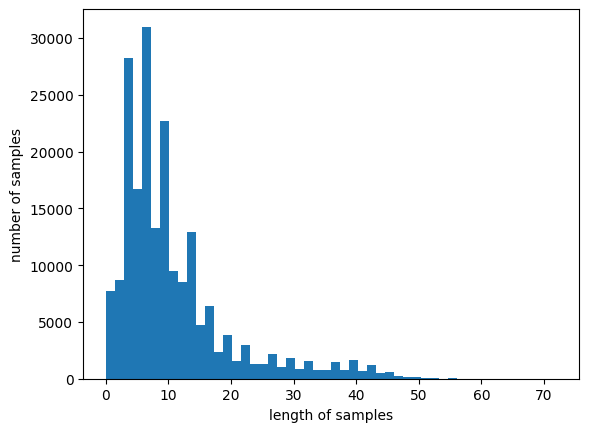

In [13]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이:', max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이:', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [14]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [15]:
model.wv.vectors.shape # 16,477개의 단어 존재

(16477, 100)

In [16]:
print(model.wv.most_similar('최민식'))

[('서영희', 0.8563438057899475), ('이민호', 0.8529213070869446), ('송강호', 0.8526298999786377), ('한석규', 0.851434051990509), ('엄정화', 0.849436342716217), ('안성기', 0.8471112251281738), ('채민서', 0.8401039242744446), ('설경구', 0.8368970155715942), ('김명민', 0.836664080619812), ('이정재', 0.8353219628334045)]


In [17]:
print(model.wv.most_similar('히어로'))

[('무협', 0.8557201027870178), ('호러', 0.8357051014900208), ('느와르', 0.8327707052230835), ('무비', 0.8176960349082947), ('물의', 0.8169436454772949), ('블랙', 0.8102979063987732), ('슬래셔', 0.8074167966842651), ('정통', 0.7989461421966553), ('블록버스터', 0.7986846566200256), ('홍콩', 0.793246865272522)]


In [18]:
# 없는 단어는 오류
# print(model.wv.most_similar('선풍기'))

KeyError: "Key '선풍기' not present in vocabulary"

### 사전 훈련된 Word2Vec 임베딩

In [22]:
import gensim
import urllib.request

# 구글의 사전 훈련된 Word2Vec 모델을 로드
#urllib.request.urlretrieve("https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz", filename="GoogleNews-vectors-negative300.bin.gz")
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [24]:
# 3 million words * 300 features * 4bytes/feature = ~3.35GB
print(word2vec_model.vectors.shape)

(3000000, 300)


In [25]:
print(word2vec_model.similarity('this', 'is'))
print(word2vec_model.similarity('post', 'book'))

0.40797034
0.057204388


In [26]:
print(word2vec_model['book'])
# 적당하게 데이터르 나열해주면 word2vec은 위치가 근접한 데이터를 유사도가 높은 벡터로 만들어줌 -> 추천 시스템 응용 가능 item2vec

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

### 네거티브 샘플링

#### 20뉴스그룹 데이터 전처리

In [21]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from konlpy.tag import Okt

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수:', len(documents))

총 샘플 수: 11314


In [22]:
news_df = pd.DataFrame({'documents': documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['documents'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하 단어 제거(대부분 불용어)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
# 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

/var/folders/fd/7w47092n2fn8h0ty9vyfqgz80000gn/T/ipykernel_9423/712966121.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['documents'].str.replace("[^a-zA-Z]", " ")


In [23]:
news_df.isnull().values.any()

False

In [24]:
# 널값은 없지만 비어있는 값도 확인해야함
news_df.replace('', float('NaN'), inplace=True)
news_df.isnull().values.any()

True

In [25]:
# 널값 제거
news_df.dropna(inplace=True)
print('총 샘플 수:', len(news_df))

총 샘플 수: 10995


In [26]:
# 불용어 제거
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

In [27]:
# 단어가 1개 이하인 샘플의 인덱스 저장, 해당 샘플은 제거
drop_trian = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.asarray(tokenized_doc, dtype='object') # numpy 버전에 따라 오류, 타입을 object로 변경하면 됨
tokenized_doc = np.delete(tokenized_doc, drop_trian, axis=0)
print('총 샘플 수:', len(tokenized_doc))

총 샘플 수: 10940


In [28]:
# 다시 리스트로 변환
tokenized_doc = tokenized_doc.tolist()

In [29]:
okt = Okt()


[['well',
  'sure',
  'story',
  'seem',
  'biased',
  'disagree',
  'statement',
  'media',
  'ruin',
  'israels',
  'reputation',
  'rediculous',
  'media',
  'israeli',
  'media',
  'world',
  'lived',
  'europe',
  'realize',
  'incidences',
  'described',
  'letter',
  'occured',
  'media',
  'whole',
  'seem',
  'ignore',
  'subsidizing',
  'israels',
  'existance',
  'europeans',
  'least',
  'degree',
  'think',
  'might',
  'reason',
  'report',
  'clearly',
  'atrocities',
  'shame',
  'austria',
  'daily',
  'reports',
  'inhuman',
  'acts',
  'commited',
  'israeli',
  'soldiers',
  'blessing',
  'received',
  'government',
  'makes',
  'holocaust',
  'guilt',
  'away',
  'look',
  'jews',
  'treating',
  'races',
  'power',
  'unfortunate'],
 ['yeah',
  'expect',
  'people',
  'read',
  'actually',
  'accept',
  'hard',
  'atheism',
  'need',
  'little',
  'leap',
  'faith',
  'jimmy',
  'logic',
  'runs',
  'steam',
  'sorry',
  'pity',
  'sorry',
  'feelings',
  'denial'